# **K-Nearest Neighbors**

In [104]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
import tensorflow as tf
from tensorflow.keras.preprocessing import image 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from matplotlib.pyplot import figure

from sklearn.metrics import classification_report

# **Load MNIST Dataset**

In [ ]:
from google.colab import files
uploaded=files.upload()

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c digit-recognizer

  0% 0.00/6.09M [00:00<?, ?B/s]
100% 6.09M/6.09M [00:00<00:00, 55.8MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 74.3MB/s]
 55% 5.00M/9.16M [00:00<00:00, 49.4MB/s]
100% 9.16M/9.16M [00:00<00:00, 58.5MB/s]


In [58]:
#unzipping the MNIST Dataset
from zipfile import ZipFile
file_name = "test.csv.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  

In [59]:
df2=pd.read_csv('test.csv')
df2.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [54]:
df = pd.read_csv('train.csv')
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [55]:
y = df.label
x = df.drop(labels='label',axis=1)

#to check weather our dataset is balanced or not
y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

Now as our data is loaded, we'll verify that by plotting some of numbers.

Index is  20843
Label: 4


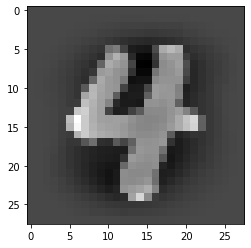

Index is  35464
Label: 2


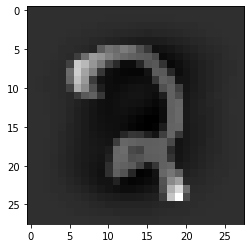

Index is  22133
Label: 2


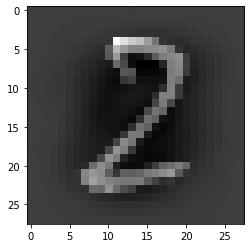

Index is  37921
Label: 6


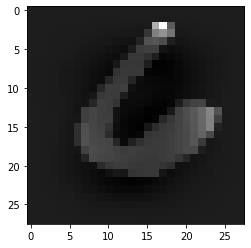

Index is  7236
Label: 1


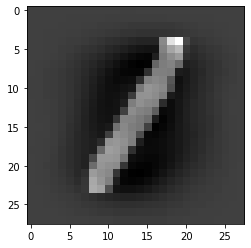

In [79]:
for i in range(0,5):
  index=np.random.randint(0,41999)
  print('Index is ',index)
  print('Label:', y[index])
  image = np.asarray(x[index])
  image=np.reshape(image,(28,28))
  plt.imshow(image,cmap='gray')
  plt.show()

In [57]:
#scale of MNIST data is [0,255]
#applying Coloumn Standardisation can change it's scale to [0,1]
scaler = StandardScaler()
x = scaler.fit_transform(x)
print(x.shape)

(42000, 784)


# **Determining Optimum K using Cross Validation**
Following will the approximate no. of  points in Training, Cross Validation and Test sets

---
Training Set = 27000


---



Cross Validation Set = 10000


---


Test Set = 5000


In [84]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x ,y , test_size=0.12 , random_state=28)
x_train,x_cv,y_train,y_cv = model_selection.train_test_split(x_train , y_train , test_size=0.27 , random_state=28)
print('Shape of Training Set is ',x_train.shape)
print('Shape of Cross Validation is ',x_cv.shape)
print('Shape of Test Set is ',x_test.shape)



Shape of Training Set is  (26980, 784)
Shape of Cross Validation is  (9980, 784)
Shape of Test Set is  (5040, 784)


In [93]:
score = []

for k in range(1, 9):
  print('Begin KNN with k=',k)
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier = classifier.fit(x_train , y_train)
  pred = classifier.predict(x_cv)
  accuracy = accuracy_score(y_cv , pred)
  score.append(accuracy)
  print("Accuracy: ",accuracy)
  
  
  

Begin KNN with k= 1
Accuracy:  0.9329659318637274
Begin KNN with k= 2
Accuracy:  0.9251503006012024
Begin KNN with k= 3
Accuracy:  0.9352705410821643
Begin KNN with k= 4
Accuracy:  0.9323647294589178
Begin KNN with k= 5
Accuracy:  0.9321643286573146
Begin KNN with k= 6
Accuracy:  0.9303607214428857
Begin KNN with k= 7
Accuracy:  0.9317635270541083
Begin KNN with k= 8
Accuracy:  0.9304609218436873


Plotting 'Accuracy' v/s 'K' graph

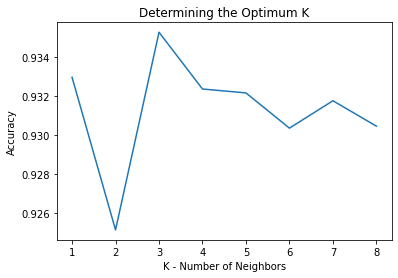

In [98]:
plt.plot(range(1,9), score)
plt.title('Determining the Optimum K')
plt.xlabel('K - Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Following are the values of K and their respective accuracies.

K = 1, accuracy = 93.296
---
K = 2, accuracy = 92.515
---
K = 3, accuracy = 93.527
---
K = 4, accuracy = 93.236
---
K = 5, accuracy = 93.216
---
K = 6, accuracy = 93.036
---
K = 7, accuracy = 93.176
---
K = 8, accuracy = 93.046
---

## As we can see accuracy on K = 3 is highest. Now we will check it's accuracy on test data. We also had to check that weather on K = 3, our model is overfit or not.

In [100]:
%%time
print('Training the model')
classifier = KNeighborsClassifier(n_neighbors=3)
classifier = classifier.fit(x_train , y_train)

Training the model
CPU times: user 6.86 s, sys: 37 ms, total: 6.89 s
Wall time: 6.84 s


# **Testing The Model**

In [102]:
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test , y_pred)
accuracy

0.9313492063492064

In [105]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       456
           1       0.99      0.94      0.96       605
           2       0.90      0.94      0.92       486
           3       0.93      0.89      0.91       535
           4       0.91      0.95      0.93       443
           5       0.91      0.95      0.93       477
           6       0.96      0.96      0.96       520
           7       0.93      0.94      0.93       519
           8       0.87      0.96      0.91       454
           9       0.92      0.88      0.90       545

    accuracy                           0.93      5040
   macro avg       0.93      0.93      0.93      5040
weighted avg       0.93      0.93      0.93      5040



## **As we can see that for each class we have good f1-score that means our model is not overfit. Hence we can conclude that our model has accurcay of 93% on K=3.**

To test my model I'll give some images and will convert it to vector 1st then will ask model to predict it.

In [133]:
from google.colab import files
uploaded=files.upload()

Saving unseen8.png to unseen8.png


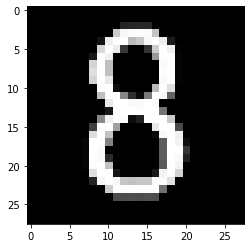

In [134]:
for img in uploaded.keys():
  path='/content/'+img
  test_photo = image.load_img(path,target_size=(28,28))
  test_array = image.img_to_array(test_photo)
  test_array = tf.image.rgb_to_grayscale(test_array) 
  test_array = np.array(test_array)
  test_array = np.reshape(test_array , (28,28))
  y_img = test_array.reshape(28,28)
  plt.imshow(y_img,cmap='gray')
  plt.show()
  

  


In [135]:
test_array = np.reshape(x,(1,784))
test_array = scaler.transform(test_array)
classifier.predict(test_array)


array([1])